<a href="https://colab.research.google.com/github/ghanalk1/Airbnb-Hotel-Booking-EDA/blob/main/Airbnb_Hotel_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Importing Dataset**

In [2]:
url = '/content/drive/MyDrive/dat/Airbnb NYC 2019.csv'

In [3]:
df = pd.read_csv(url)
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [4]:
df.tail(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# **2. Preprocessing the data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### **removing less important columns**

In [7]:
# removing less important columns
hotel = df.drop(['name', 'host_name', 'last_review'], axis=1)

In [8]:
# checking new dataframe
hotel.head(3)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


### **checking and handling null values**

In [9]:
# checking null values
hotel.isna().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
# checking reviews_per_month column to get idea of it's values
hotel['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

In [11]:
# replacing null values with 0
hotel.fillna(value={'reviews_per_month': 0}, inplace=True)

In [12]:
# null values handled
hotel.isna().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# **3. Exploratory Data Analysis**

### **number of hotels in different neighbourhood_group**

In [13]:
hotel['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64



> #### Therefore Manhattan and Brooklyn have the highest number of hotels while Staten Island having the least



### **top 10 values of neighbourhood with highest number of hotels**

In [14]:
hotel['neighbourhood'].value_counts()[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64



> #### Williamsburg, Bedford-Stuyvesant are the neighbours with highest number of hotels



### **number of different types of hotels**

In [15]:
hotel.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [16]:
hotel['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

([<matplotlib.patches.Wedge at 0x7f90df161610>,
 [Text(-0.14199930606731279, 2.295612379535448, 'Entire home/apt'),
  Text(-0.029333460164344863, -2.299812937635317, 'Private room'),
  Text(2.3434758426783215, -0.17498849900244787, 'Shared room')],
 [Text(-0.0802604773423942, 1.2975200406069922, '52%'),
  Text(-0.016579781832021006, -1.2998942690982225, '46%'),
  Text(1.3462520798364825, -0.10052530793757641, '2%')])

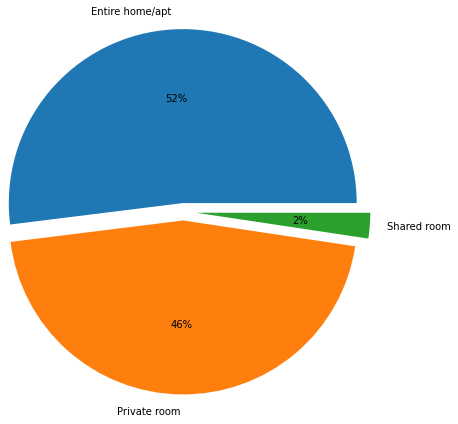

In [17]:
# piechart to show percentage
x = hotel.groupby('room_type')['id'].count().reset_index().rename(columns={'id': 'Count'})
plt.pie(x['Count'], labels=x['room_type'], radius=2, explode=[0.1,0.1,0.15], autopct='%1.0f%%')



> #### Entire home/apt type of hotels are highest



### **different types of hotels in each neighbourhood_groups**

Text(0.5, 1.0, 'Hotel types in different areas')

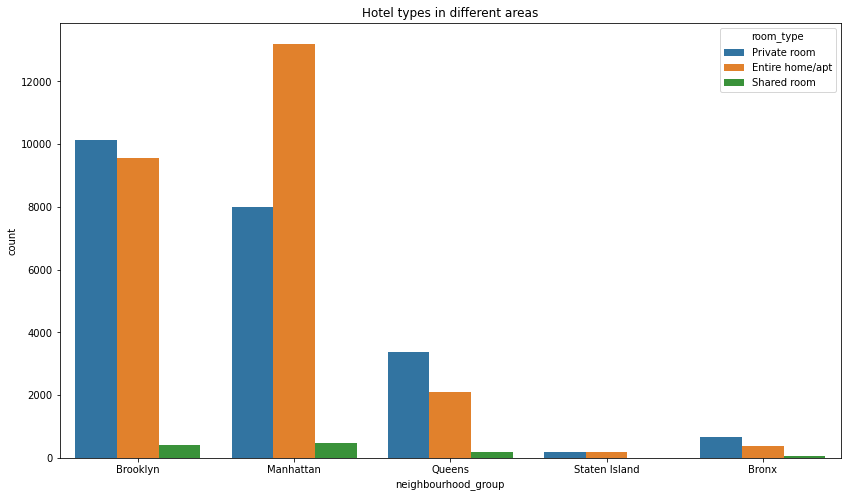

In [18]:
plt.figure(figsize=[14,8])
sns.countplot(data=hotel, x='neighbourhood_group', hue='room_type')
plt.title('Hotel types in different areas')



> #### The 'shared room' hotel type is least popular among all the neighbourhood_groups. Whereas 'Private room' is the most popular among Brooklyn, Queens, Bronx (highest in Brooklyn). In Manhattan, 'Entire home/apt' is most popular.



### **median prices of different room types**

Text(0.5, 1.0, 'Median Price for each room_type')

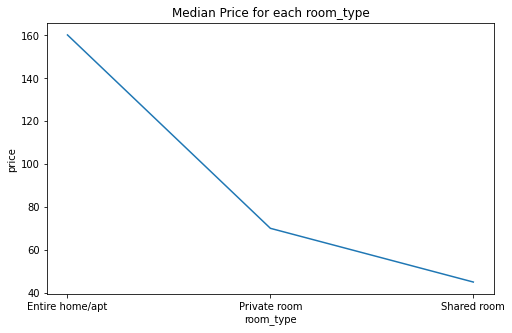

In [19]:
median_price = hotel.groupby('room_type')['price'].median().reset_index()
plt.figure(figsize=[8,5])
sns.lineplot(data=median_price, x='room_type', y='price')
plt.title('Median Price for each room_type')



> #### As expected, 'Entire home/apt' is the most expensive option while 'Shared room' being the cheapest



### **Variation in median prices of room_types for each neighbourhood_group**

Text(0.5, 1.0, 'Each neighbourhood_group median price for room_types')

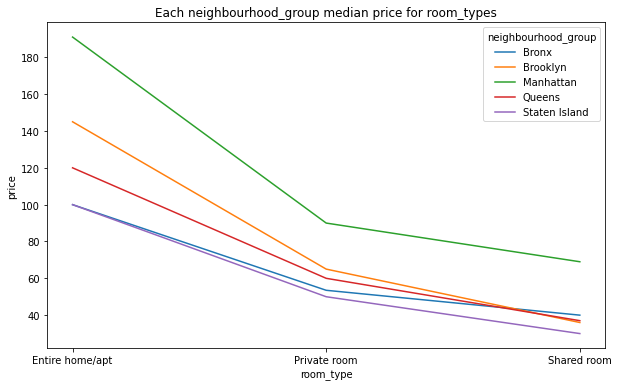

In [20]:
variation_price = hotel.groupby(['neighbourhood_group', 'room_type'])['price'].median().reset_index()
plt.figure(figsize=[10,6])
sns.lineplot(data=variation_price, x='room_type', y='price', hue='neighbourhood_group')
plt.title('Each neighbourhood_group median price for room_types')



> #### Manhattan is the most expensive option for any room type, followed by Brooklyn. Staten Island and Bronx have the cheapest rooms of any type (Staten Island being overall the most cheap). Queens is the middle point



### **number_of_reviews each neighbourhood_group has**


In [21]:
# calculating average reviews a neighbourhood_group has
reviews = hotel.groupby('neighbourhood_group')['number_of_reviews'].mean().reset_index()
reviews

,neighbourhood_group,number_of_reviews
0,Bronx,26.004583
1,Brooklyn,24.202845
2,Manhattan,20.985596
3,Queens,27.700318
4,Staten Island,30.941019


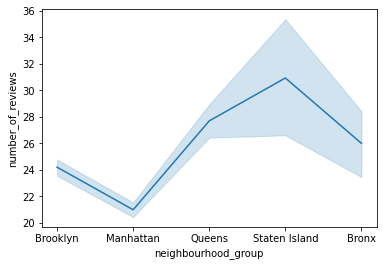

In [22]:
sns.lineplot(data=hotel, x='neighbourhood_group', y='number_of_reviews')

> #### Staten Island has the highest average number of reviews a hotel gets while Brooklyn having the lowest average.

In [23]:
# calculating count of reviews a neighbourhood_group has
reviews_count = hotel.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index()
reviews_count

,neighbourhood_group,number_of_reviews
0,Bronx,28371
1,Brooklyn,486574
2,Manhattan,454569
3,Queens,156950
4,Staten Island,11541


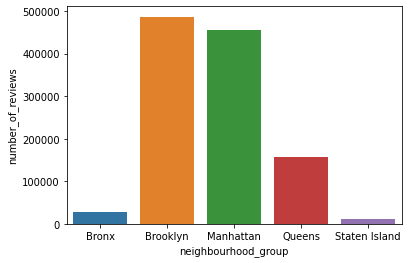

In [24]:
sns.barplot(data=reviews_count, x='neighbourhood_group', y='number_of_reviews')




> #### In terms of reviews a neighbourhood_group gets in total, Brooklyn has the highest count followed by Manhattan. Here, Staten Island has the lowest count, explaining why it had such a high average review per hotel.





### **number_of _reviews a room_type gets in a neighbourhood_group**

In [25]:
reviews_room_type = hotel.groupby(['neighbourhood_group', 'room_type'])['number_of_reviews'].sum().reset_index()
reviews_room_type

,neighbourhood_group,room_type,number_of_reviews
0,Bronx,Entire home/apt,11627
1,Bronx,Private room,16312
2,Bronx,Shared room,432
3,Brooklyn,Entire home/apt,267128
4,Brooklyn,Private room,213653
5,Brooklyn,Shared room,5793
6,Manhattan,Entire home/apt,235147
7,Manhattan,Private room,209150
8,Manhattan,Shared room,10272
9,Queens,Entire home/apt,60644


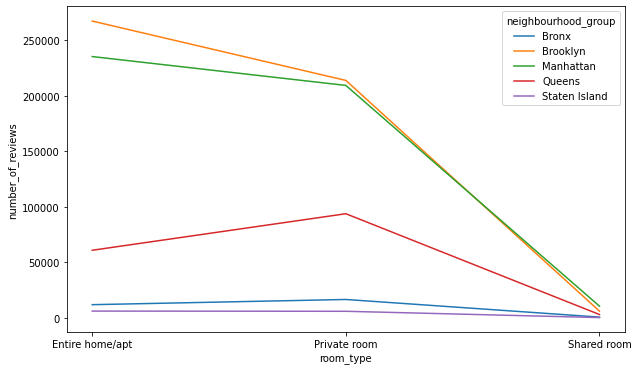

In [26]:
plt.figure(figsize=[10,6])
sns.lineplot(data=reviews_room_type, x='room_type', y='number_of_reviews', hue='neighbourhood_group')



> #### In every neighbourhood_group, 'Shared room' are the lowest reviewed hotels. Brooklyn is the highest reviewed region for 'Entire home/apt' and 'Private room' followed closely by Manhattan. Queens on the other hand comes in between the highest and lowest voted. Staten Island is the lowest reviewed overall, followed closely by Bronx.



### **Availability (0-365) of hotels**

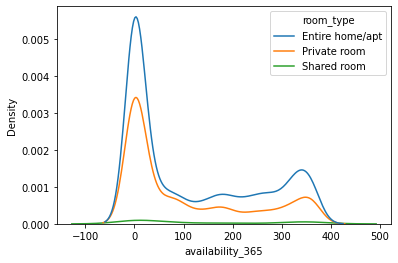

In [45]:
# availability of each type of hotel in every neigbourhood_group

# for Manhattan
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Manhattan'], x='availability_365', hue='room_type')

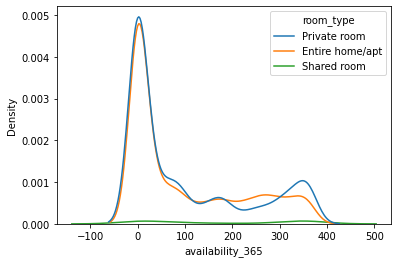

In [46]:
# for Brooklyn
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Brooklyn'], x='availability_365', hue='room_type')

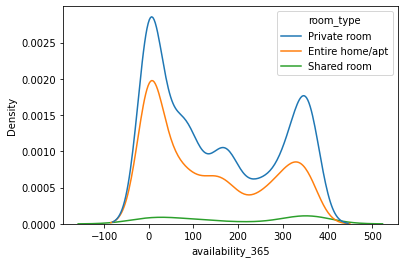

In [47]:
# for Queens
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Queens'], x='availability_365', hue='room_type')

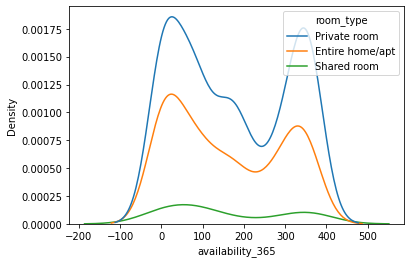

In [48]:
# for Bronx
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Bronx'], x='availability_365', hue='room_type')

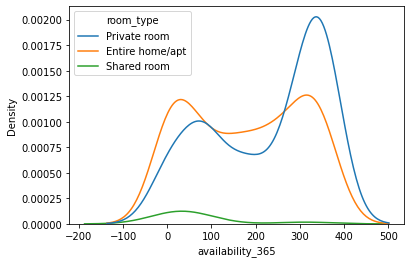

In [49]:
# for Staten Island
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Staten Island'], x='availability_365', hue='room_type')

### **minumum nights a person stays in a hotel**

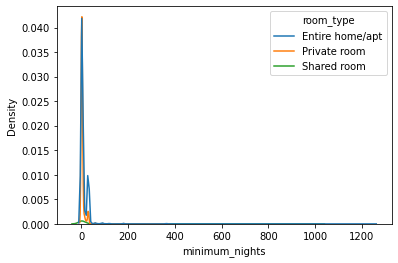

In [55]:
# minimum nights a person stays in different types of hotels in every neigbourhood_group

# for Manhattan
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Manhattan'], x='minimum_nights', hue='room_type')

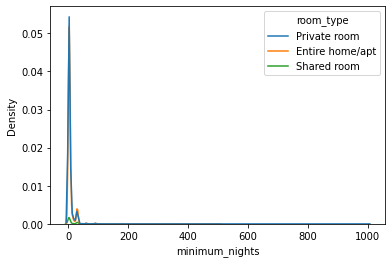

In [56]:
# for Brooklyn
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Brooklyn'], x='minimum_nights', hue='room_type')

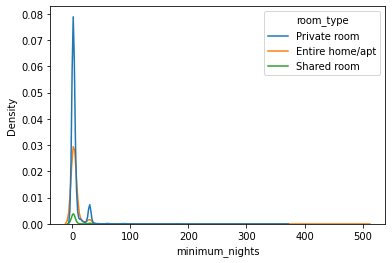

In [57]:
# for Queens
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Queens'], x='minimum_nights', hue='room_type')

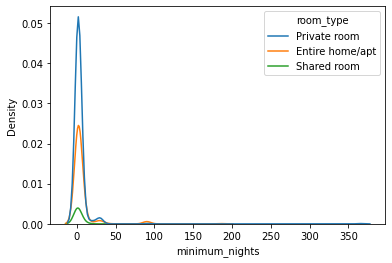

In [58]:
# for Bronx
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Bronx'], x='minimum_nights', hue='room_type')

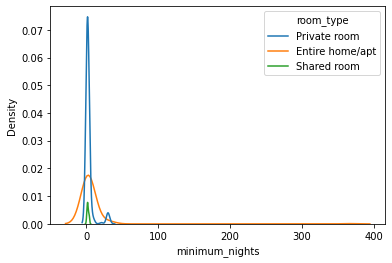

In [59]:
# for Staten Island
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Staten Island'], x='minimum_nights', hue='room_type')

### **plotting hotels using their longitude and latitude**

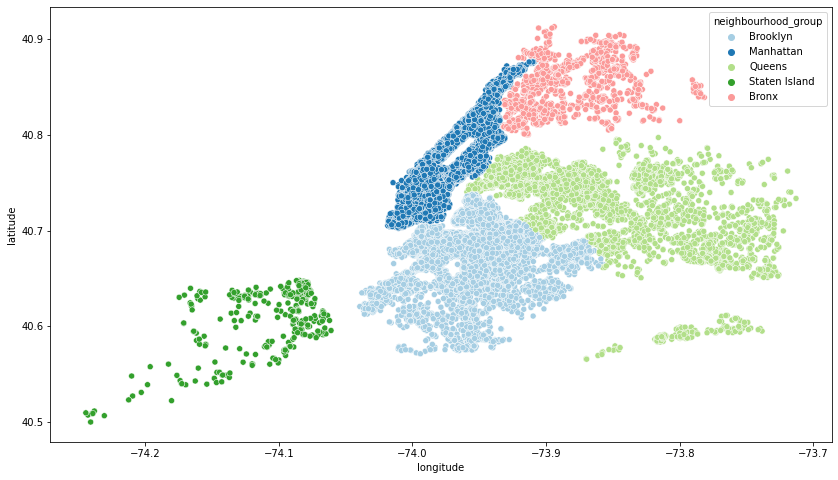

In [112]:
# whole new york city
plt.figure(figsize=[14, 8])
sns.scatterplot(data=hotel, y='latitude', x='longitude', hue='neighbourhood_group', palette='Paired')

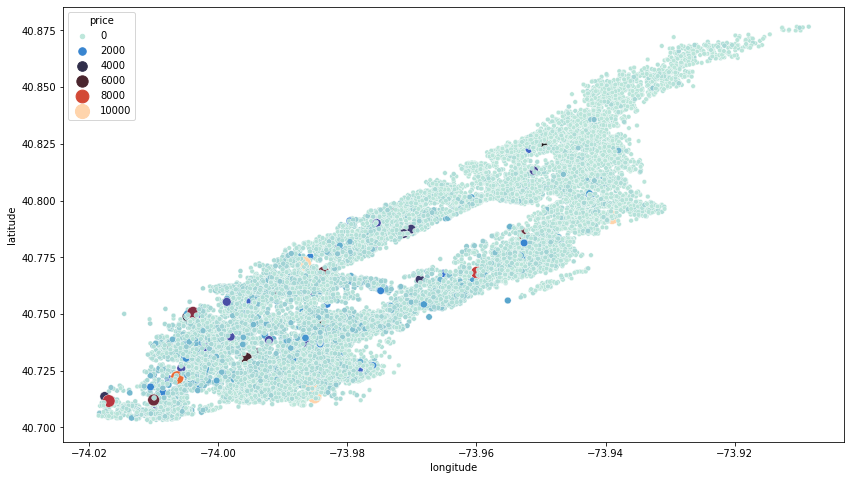

In [104]:
# plotting Manhattan
plt.figure(figsize=[14, 8])
sns.scatterplot(data=hotel[hotel['neighbourhood_group'] == 'Manhattan'], y='latitude', x='longitude', hue='price', size='price', sizes=(20, 200), palette='icefire')

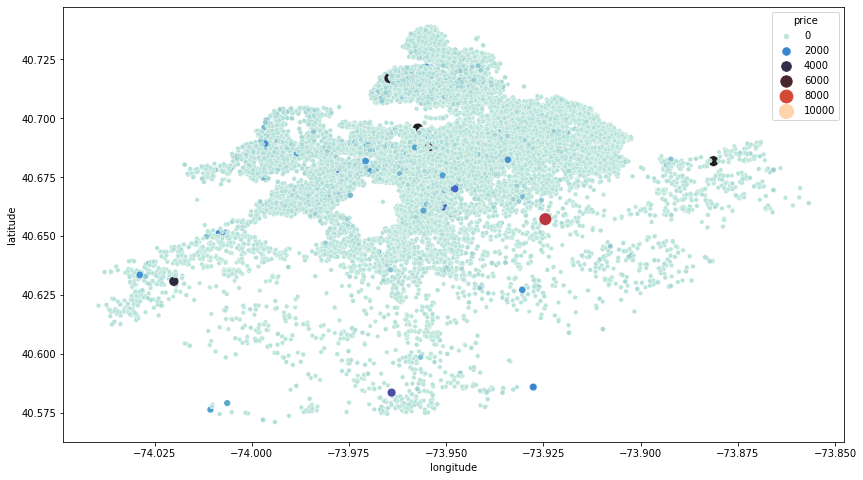

In [105]:
# plotting Brooklyn
plt.figure(figsize=[14, 8])
sns.scatterplot(data=hotel[hotel['neighbourhood_group'] == 'Brooklyn'], y='latitude', x='longitude', hue='price', size='price', sizes=(20, 200), palette='icefire')

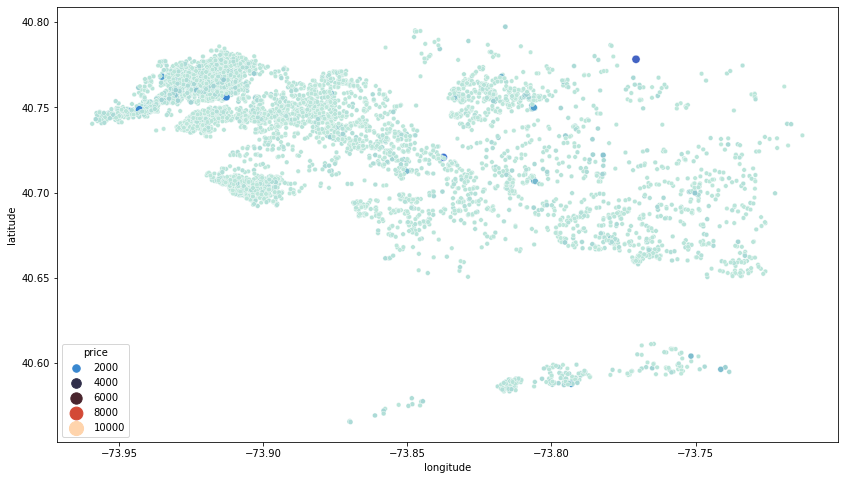

In [106]:
# plotting Queens
plt.figure(figsize=[14, 8])
sns.scatterplot(data=hotel[hotel['neighbourhood_group'] == 'Queens'], y='latitude', x='longitude', hue='price', size='price', sizes=(20, 200), palette='icefire')

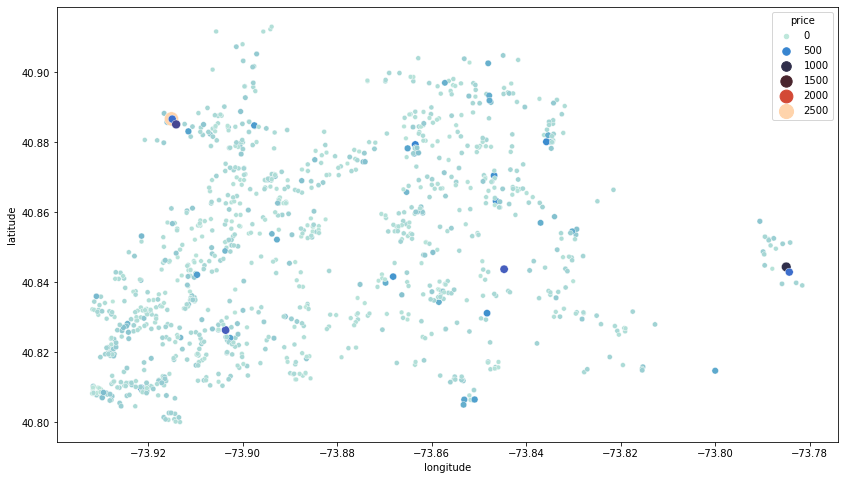

In [107]:
# plotting bronx
plt.figure(figsize=[14, 8])
sns.scatterplot(data=hotel[hotel['neighbourhood_group'] == 'Bronx'], y='latitude', x='longitude', hue='price', size='price', sizes=(20, 200), palette='icefire')

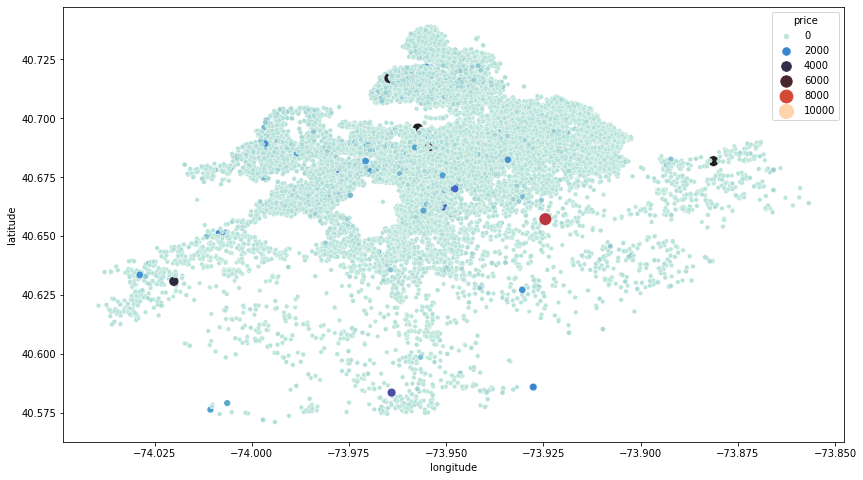

In [108]:
# plotting Staten Island
plt.figure(figsize=[14, 8])
sns.scatterplot(data=hotel[hotel['neighbourhood_group'] == 'Brooklyn'], y='latitude', x='longitude', hue='price', size='price', sizes=(20, 200), palette='icefire')

In [27]:
hotel.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
